## Setup

### External libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### Project modules

In [5]:
cd ..

/home/jarom/school/NatComp/project


/home/jarom/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import sys
sys.path.append("../src/")
from env_modules_python import module

from population import Population, Initialization
from simulation import Simulation
from plotting import *
from geometry import *
from election import Election
from agents import Voter, Candidate, System, Strategy, Approach

ModuleNotFoundError: No module named 'src'

#### Parameters

Dictionary specifying all parameters of the simulations.
Parameters can be adjusted in between different runs by changing the attributes of the dictionary.

In [3]:
params = {
    # Simulation parameters
    "n_rounds": 10,             # Number of election rounds
    "n_polls": 5,               # Number of polling rounds between elections
    # Election parameters
    "system" : System.FPTP,   # Electoral system, one of FPTP INSTANT_RUNOFF APPROVAL
    "threshold" : 0.1,                  # Percentage threshold for getting elected to the parliament
    "dist_metric" : distance_euclid,    # Distance metric
    # Population parameters
    "dimension": 2,             # Dimension of the space in which voters and candidates are located
    "low": -1,                  # Lower bound for the uniform distribution of voter positions
    "high": 1,                  # Upper bound for the uniform distribution of voter positions
    "mu": 0,                    # Mean for the normal distribution of voter positions
    "sigma": 1,
    "cand_dist": Initialization.UNIFORM,    # Distribution type for candidate positions: UNIFORM NORMAL CLUSTER CUSTOM
    "n_candidates": 10,                     # Number of candidates in the election
    "cand_approach_dist": {
        Approach.RANDOM : 0.05,
        Approach.HONEST : 0.45,
        Approach.DEFENSIVE : 0.25,
        Approach.OFFENSIVE : 0.25
    },
    "voter_dist": Initialization.UNIFORM,   # Distribution type for voter positions: UNIFORM NORMAL CLUSTER CUSTOM
    "n_voters": 200,                        # Number of voters in the population
    "voter_strat_dist": {
        Strategy.RANDOM : 0.05,
        Strategy.HONEST : 0.10,
        Strategy.POPULIST : 0.10,
        Strategy.REALIST : 0.50,
        Strategy.LOYAL : 0.25,
    },
    "use_local_neighborhood": False,         # Whether to use local neighborhood for updating voter opinions
    "neighborhood_radius": 0.2,             # Radius for the local neighborhood around
    "per_polls": 0.1,                       # Percentage of the subsample size when polling
    # Voter parameters
    "best_preference": 1.0,     # Weight of distance to best candidate for toleration radius
    "worst_tolerance": 0.8,     # Weight of distance to worst candidate for toleration radius
    "campaign_weight": 0.4,     # Weight of campaign message in the voter's decision
    "poll_weight": 0.2,         # Weight of polls in the voter's decision
    "social_weight": 0.6,       # Weight of social influence in the voter's decision
    # Candidate parameters
    "approach_weight": 0.005,   # Weight of the approach in the candidate's position update
}

## Simulations setup

In [4]:
populationA = Population(params=params) # Set up the population to be used during the simulation

If we want to compare a simulation with the same parameters, but different population, we can just adjust the dictionary and pass it to the constructor again.

In [5]:
params["cand_approach_dist"] = {
        Approach.RANDOM : 0.00,
        Approach.HONEST : 1.0,
        Approach.DEFENSIVE : 0.0,
        Approach.OFFENSIVE : 0.0
}
populationB = Population(params=params)

Then we can setup the population, again using the dictionary of parameters.

In [6]:
sim_fptp_A = Simulation(population=populationA, params=params)
sim_fptp_B = Simulation(population=populationB, params=params)

Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.


And again, we can setup a different simulation by changing the relevant dictionary parameters, and passing it to the constructor.

In [7]:
params["system"] = System.APPROVAL
params["threshold"] = 0.5
sim_approval_A = Simulation(population=populationA, params=params)
sim_approval_B = Simulation(population=populationB, params=params)

Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.


### Running Simulations

We can save the results into a json file (save_results=True), create a gif of the scatterplots during the election run (make_gif=True), and also save the intermediate pngs used to compose the gif (delete_frames=False)

In [8]:
output_A = sim_fptp_A.run_election_cycles(save_results=False, make_gif=True, delete_frames=False)
print(f"Simulation", output_A.get('sim_id'), "completed.") # simulation ID consisting of a timestamp

Running round 1/10
Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Simulation 2025-06-23_20-19-01-533165802898 completed.


In [9]:
output_B = sim_fptp_B.run_election_cycles(save_results=False, make_gif=False, delete_frames=True)
print(f"Simulation", output_B.get('sim_id'), "completed.") # simulation ID consisting of a timestamp

Running round 1/10
Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Simulation 2025-06-23_20-19-29-009963564573 completed.


Quantitative results can be found in the output dictionary

In [10]:
results_A = output_A.get("results")
results_B = output_B.get("results")
print(results_A)
print(results_B)

[{'round': 0, 'votes_count': [0, 0, 80, 0, 0, 0, 43, 0, 0, 0], 'votes_per': [0.0, 0.0, 0.6504065040650406, 0.0, 0.0, 0.0, 0.34959349593495936, 0.0, 0.0, 0.0], 'vse_util': 0.7823752837588841, 'vse_comp': 0.0, 'vse_vdist_comp': 0.6207602053767963, 'norm_entropy': 0.2810730581932377}, {'round': 1, 'votes_count': [0, 0, 74, 0, 45, 0, 25, 0, 0, 0], 'votes_per': [0.0, 0.0, 0.5138888888888888, 0.0, 0.3125, 0.0, 0.1736111111111111, 0.0, 0.0, 0.0], 'vse_util': 0.802274574680925, 'vse_comp': 0.0, 'vse_vdist_comp': 0.727531789361326, 'norm_entropy': 0.43845825183980763}, {'round': 2, 'votes_count': [0, 0, 76, 0, 26, 0, 41, 0, 0, 0], 'votes_per': [0.0, 0.0, 0.5314685314685315, 0.0, 0.18181818181818182, 0.0, 0.2867132867132867, 0.0, 0.0, 0.0], 'vse_util': 0.7891386316489455, 'vse_comp': 0.0, 'vse_vdist_comp': 0.6947537986297005, 'norm_entropy': 0.43606835784205084}, {'round': 3, 'votes_count': [0, 0, 76, 0, 46, 0, 20, 0, 0, 0], 'votes_per': [0.0, 0.0, 0.5352112676056338, 0.0, 0.323943661971831, 0.0

#### Plotting

Quantitative results can be observed in the dynamics plots

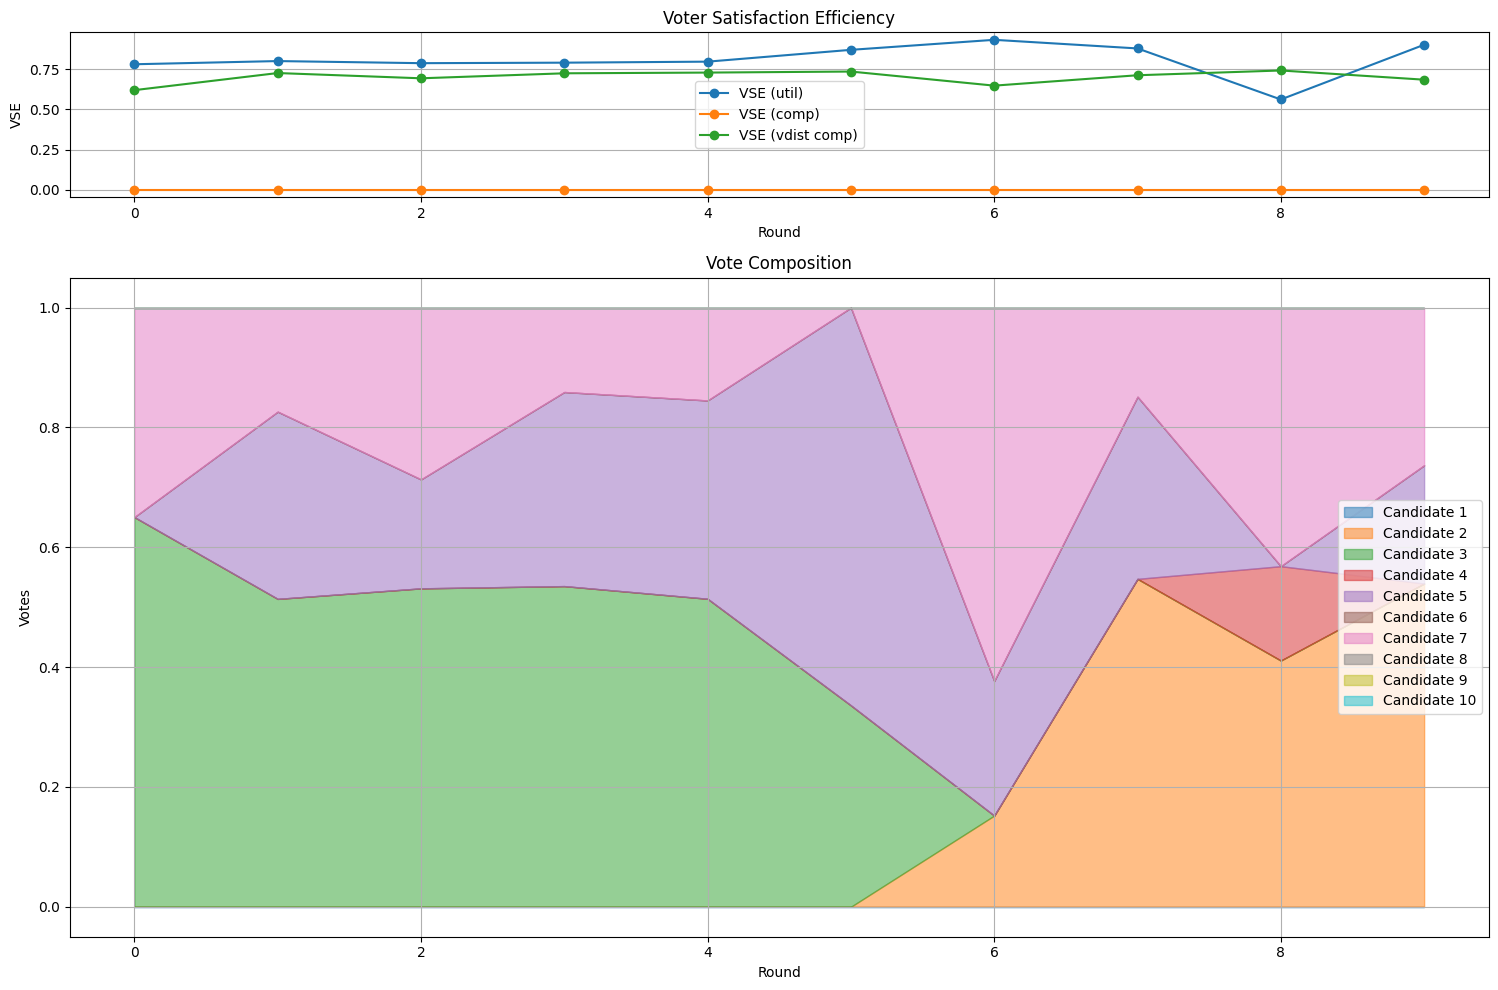

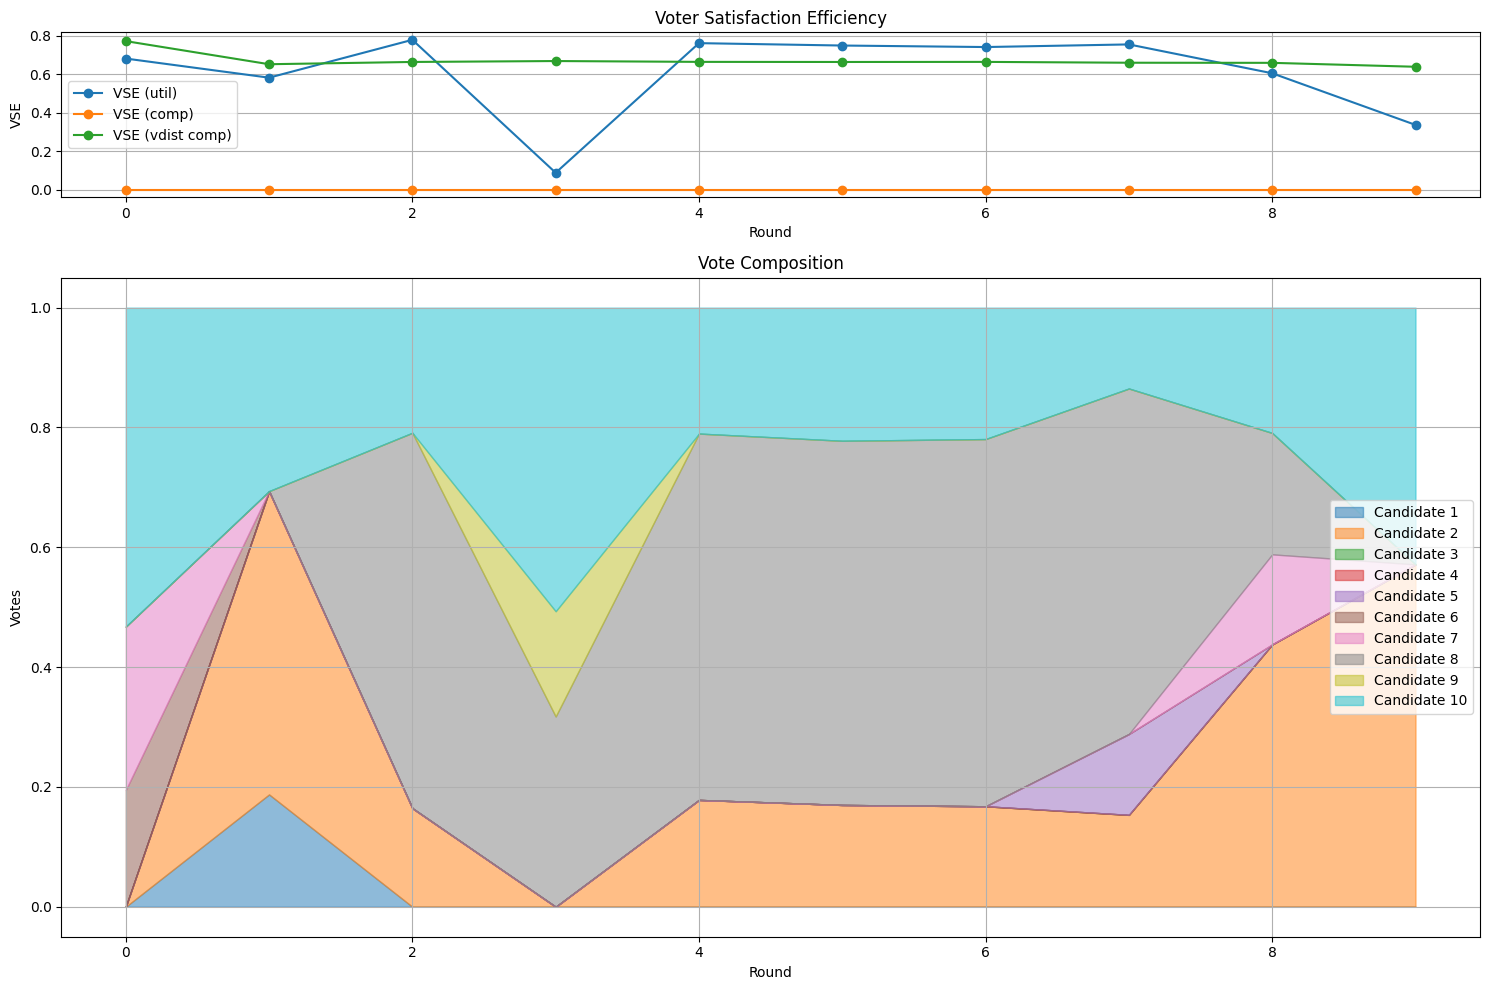

In [11]:
plot_sim_dynamics(results_A, output_path="results_FPTP_A.png")
plot_sim_dynamics(results_B, output_path="results_FPTP_B.png")